# Analysis

Observations:
1. As the coordinates approach to the equator, or the closer the city is to the equator, the higher the temperature. 
2. According to this random data, majority of these citie's Latitudes seem to be greater than 0 which applies they are from the northern part of the hemisphere, however there is no relationship between their latitudes and huminity levels.
3. Similarly, there is no relationship between latitudes and cloudiness percentage for these random cities
4. Lastly, the further away from the equator, the higher the wind speed.However, is it a very weak correlation.

In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests as req
import numpy as np
import time
from citipy import citipy
from weatherfig import api_key
from datetime import datetime

In [2]:
# Generating random latitudes and longitudes for 1200 cities
lat = np.random.uniform(low=-90, high=90, size=1200)
lng = np.random.uniform(low=-180, high=180, size=1200)

# Creating coordinate pairs
coordinates = []
for x in range(0,len(lat)):
    coordinates.append((lat[x], lng[x]))
# print (coordinates)

In [3]:
# Finding the cities nearest to the coordinates
cities = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))

# Creating DataFrame
cities_df = pd.DataFrame(cities)
cities_df["City Name"] = ""
cities_df["Country Code"] = ""

for index, row in cities_df.iterrows():
    row["City Name"] = cities_df.iloc[index,0].city_name
    row["Country Code"] = cities_df.iloc[index,0].country_code

# Dropping duplicate cities
cities_df.drop_duplicates(['City Name', 'Country Code'], inplace=True)
cities_df.reset_index(inplace=True)

# Deleting unnecessary columns
del cities_df[0]
del cities_df['index']

cities_df.head()

,City Name,Country Code
0,rikitea,pf
1,srednekolymsk,ru
2,carnarvon,au
3,louisbourg,ca
4,yulara,au


In [4]:
# Adding columns for values
cities_df['Latitude'] = ""
cities_df['Longitude'] = ""
cities_df['Temperature (F)'] = ""
cities_df['Humidity (%)'] = ""
cities_df['Cloudiness (%)'] = ""
cities_df['Wind Speed (mph)'] = ""

cities_df.head()

,City Name,Country Code,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,rikitea,pf,,,,,,
1,srednekolymsk,ru,,,,,,
2,carnarvon,au,,,,,,
3,louisbourg,ca,,,,,,
4,yulara,au,,,,,,


In [5]:
# Accessing data
print("Beginning Data Retrieval")
print("---------------------------------")

# Limiting pull requests
start_time = time.time()

for index, row in cities_df.iterrows():
    # Building target url
    url = "http://api.openweathermap.org/data/2.5/weather?q=%s,%s&units=imperial&appid=%s" % (row['City Name'], 
                                                                                              row['Country Code'], 
                                                                                              api_key)
    print(url)
    # Printing to ensure loop is correct
    print("Now retrieving City #" + str(index) + ": " + row['City Name'] + ", " + row['Country Code'])
    print(url)
    
    # Running request
    weather_data = req.get(url).json()
    
    try:
        # Appending latitude and longitude to correct location
        row['Latitude'] = weather_data['coord']['lat']
        row['Longitude'] = weather_data['coord']['lon']
    
        # Appending temperature to correct location
        row['Temperature (F)'] = weather_data['main']['temp']
    
        # Appending humidity to correct location
        row['Humidity (%)'] = weather_data['main']['humidity']
    
        # Appending cloudiness to correct location
        row['Cloudiness (%)'] = weather_data['clouds']['all']
    
        # Appending wind speed to correct location
        row['Wind Speed (mph)'] = weather_data['wind']['speed']
    except:
        print("Error with city data. Skipping")
        continue
        
    # Pausing to limit pull requests
    if (index + 1) % 60 == 0:
        run_time = time.time() - start_time
        time.sleep(60 - run_time)
        start_time = time.time()
    
print("---------------------------------")
print("Data Retrieval Complete")
print("---------------------------------")

# Changing strings to floats
columns = ['Latitude', 'Temperature (F)', 'Humidity (%)', 'Cloudiness (%)', 'Wind Speed (mph)']
for column in columns:
    cities_df[column] = pd.to_numeric(cities_df[column], errors='coerce')
    
# Dropping NaN values
cities_df.dropna(inplace=True)

cities_df.head()

Beginning Data Retrieval
---------------------------------
http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #0: rikitea, pf
http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&appid=997ac1bb517def3f586c903aa0200103
http://api.openweathermap.org/data/2.5/weather?q=srednekolymsk,ru&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #1: srednekolymsk, ru
http://api.openweathermap.org/data/2.5/weather?q=srednekolymsk,ru&units=imperial&appid=997ac1bb517def3f586c903aa0200103
http://api.openweathermap.org/data/2.5/weather?q=carnarvon,au&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #2: carnarvon, au
http://api.openweathermap.org/data/2.5/weather?q=carnarvon,au&units=imperial&appid=997ac1bb517def3f586c903aa0200103
http://api.openweathermap.org/data/2.5/weather?q=louisbourg,ca&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retr

http://api.openweathermap.org/data/2.5/weather?q=geraldton,au&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #32: geraldton, au
http://api.openweathermap.org/data/2.5/weather?q=geraldton,au&units=imperial&appid=997ac1bb517def3f586c903aa0200103
http://api.openweathermap.org/data/2.5/weather?q=avera,pf&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #33: avera, pf
http://api.openweathermap.org/data/2.5/weather?q=avera,pf&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Error with city data. Skipping
http://api.openweathermap.org/data/2.5/weather?q=puerto ayora,ec&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #34: puerto ayora, ec
http://api.openweathermap.org/data/2.5/weather?q=puerto ayora,ec&units=imperial&appid=997ac1bb517def3f586c903aa0200103
http://api.openweathermap.org/data/2.5/weather?q=muisne,ec&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #35: muisne, ec
http://api

http://api.openweathermap.org/data/2.5/weather?q=tsihombe,mg&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #63: tsihombe, mg
http://api.openweathermap.org/data/2.5/weather?q=tsihombe,mg&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Error with city data. Skipping
http://api.openweathermap.org/data/2.5/weather?q=yellowknife,ca&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #64: yellowknife, ca
http://api.openweathermap.org/data/2.5/weather?q=yellowknife,ca&units=imperial&appid=997ac1bb517def3f586c903aa0200103
http://api.openweathermap.org/data/2.5/weather?q=jamestown,sh&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #65: jamestown, sh
http://api.openweathermap.org/data/2.5/weather?q=jamestown,sh&units=imperial&appid=997ac1bb517def3f586c903aa0200103
http://api.openweathermap.org/data/2.5/weather?q=stornoway,gb&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #66: stornoway, g

http://api.openweathermap.org/data/2.5/weather?q=kasongo-lunda,cd&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #93: kasongo-lunda, cd
http://api.openweathermap.org/data/2.5/weather?q=kasongo-lunda,cd&units=imperial&appid=997ac1bb517def3f586c903aa0200103
http://api.openweathermap.org/data/2.5/weather?q=arys,kz&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #94: arys, kz
http://api.openweathermap.org/data/2.5/weather?q=arys,kz&units=imperial&appid=997ac1bb517def3f586c903aa0200103
http://api.openweathermap.org/data/2.5/weather?q=jaleswar,in&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #95: jaleswar, in
http://api.openweathermap.org/data/2.5/weather?q=jaleswar,in&units=imperial&appid=997ac1bb517def3f586c903aa0200103
http://api.openweathermap.org/data/2.5/weather?q=saint-georges,gf&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #96: saint-georges, gf
http://api.openweathermap.org/

http://api.openweathermap.org/data/2.5/weather?q=kaitangata,nz&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #125: kaitangata, nz
http://api.openweathermap.org/data/2.5/weather?q=kaitangata,nz&units=imperial&appid=997ac1bb517def3f586c903aa0200103
http://api.openweathermap.org/data/2.5/weather?q=waipawa,nz&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #126: waipawa, nz
http://api.openweathermap.org/data/2.5/weather?q=waipawa,nz&units=imperial&appid=997ac1bb517def3f586c903aa0200103
http://api.openweathermap.org/data/2.5/weather?q=taolanaro,mg&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #127: taolanaro, mg
http://api.openweathermap.org/data/2.5/weather?q=taolanaro,mg&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Error with city data. Skipping
http://api.openweathermap.org/data/2.5/weather?q=ust-kulom,ru&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #128: ust-kulom, ru


http://api.openweathermap.org/data/2.5/weather?q=hilo,us&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #156: hilo, us
http://api.openweathermap.org/data/2.5/weather?q=hilo,us&units=imperial&appid=997ac1bb517def3f586c903aa0200103
http://api.openweathermap.org/data/2.5/weather?q=kaeo,nz&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #157: kaeo, nz
http://api.openweathermap.org/data/2.5/weather?q=kaeo,nz&units=imperial&appid=997ac1bb517def3f586c903aa0200103
http://api.openweathermap.org/data/2.5/weather?q=vanavara,ru&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #158: vanavara, ru
http://api.openweathermap.org/data/2.5/weather?q=vanavara,ru&units=imperial&appid=997ac1bb517def3f586c903aa0200103
http://api.openweathermap.org/data/2.5/weather?q=talara,pe&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #159: talara, pe
http://api.openweathermap.org/data/2.5/weather?q=talara,pe&units=im

http://api.openweathermap.org/data/2.5/weather?q=boo,se&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #188: boo, se
http://api.openweathermap.org/data/2.5/weather?q=boo,se&units=imperial&appid=997ac1bb517def3f586c903aa0200103
http://api.openweathermap.org/data/2.5/weather?q=tumannyy,ru&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #189: tumannyy, ru
http://api.openweathermap.org/data/2.5/weather?q=tumannyy,ru&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Error with city data. Skipping
http://api.openweathermap.org/data/2.5/weather?q=bambous virieux,mu&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #190: bambous virieux, mu
http://api.openweathermap.org/data/2.5/weather?q=bambous virieux,mu&units=imperial&appid=997ac1bb517def3f586c903aa0200103
http://api.openweathermap.org/data/2.5/weather?q=kenai,us&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #191: kenai, us
http://a

http://api.openweathermap.org/data/2.5/weather?q=viedma,ar&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #220: viedma, ar
http://api.openweathermap.org/data/2.5/weather?q=viedma,ar&units=imperial&appid=997ac1bb517def3f586c903aa0200103
http://api.openweathermap.org/data/2.5/weather?q=tiksi,ru&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #221: tiksi, ru
http://api.openweathermap.org/data/2.5/weather?q=tiksi,ru&units=imperial&appid=997ac1bb517def3f586c903aa0200103
http://api.openweathermap.org/data/2.5/weather?q=ereymentau,kz&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #222: ereymentau, kz
http://api.openweathermap.org/data/2.5/weather?q=ereymentau,kz&units=imperial&appid=997ac1bb517def3f586c903aa0200103
http://api.openweathermap.org/data/2.5/weather?q=sakakah,sa&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #223: sakakah, sa
http://api.openweathermap.org/data/2.5/weather?q=s

http://api.openweathermap.org/data/2.5/weather?q=lodeynoye pole,ru&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #252: lodeynoye pole, ru
http://api.openweathermap.org/data/2.5/weather?q=lodeynoye pole,ru&units=imperial&appid=997ac1bb517def3f586c903aa0200103
http://api.openweathermap.org/data/2.5/weather?q=ulladulla,au&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #253: ulladulla, au
http://api.openweathermap.org/data/2.5/weather?q=ulladulla,au&units=imperial&appid=997ac1bb517def3f586c903aa0200103
http://api.openweathermap.org/data/2.5/weather?q=sirur,in&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #254: sirur, in
http://api.openweathermap.org/data/2.5/weather?q=sirur,in&units=imperial&appid=997ac1bb517def3f586c903aa0200103
http://api.openweathermap.org/data/2.5/weather?q=te anau,nz&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #255: te anau, nz
http://api.openweathermap.org

http://api.openweathermap.org/data/2.5/weather?q=miranda de ebro,es&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #283: miranda de ebro, es
http://api.openweathermap.org/data/2.5/weather?q=miranda de ebro,es&units=imperial&appid=997ac1bb517def3f586c903aa0200103
http://api.openweathermap.org/data/2.5/weather?q=bousso,td&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #284: bousso, td
http://api.openweathermap.org/data/2.5/weather?q=bousso,td&units=imperial&appid=997ac1bb517def3f586c903aa0200103
http://api.openweathermap.org/data/2.5/weather?q=khani,ru&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #285: khani, ru
http://api.openweathermap.org/data/2.5/weather?q=khani,ru&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Error with city data. Skipping
http://api.openweathermap.org/data/2.5/weather?q=san cristobal,ec&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #286: san cristo

http://api.openweathermap.org/data/2.5/weather?q=sola,vu&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #314: sola, vu
http://api.openweathermap.org/data/2.5/weather?q=sola,vu&units=imperial&appid=997ac1bb517def3f586c903aa0200103
http://api.openweathermap.org/data/2.5/weather?q=ligayan,ph&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #315: ligayan, ph
http://api.openweathermap.org/data/2.5/weather?q=ligayan,ph&units=imperial&appid=997ac1bb517def3f586c903aa0200103
http://api.openweathermap.org/data/2.5/weather?q=rawannawi,ki&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #316: rawannawi, ki
http://api.openweathermap.org/data/2.5/weather?q=rawannawi,ki&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Error with city data. Skipping
http://api.openweathermap.org/data/2.5/weather?q=tarko-sale,ru&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #317: tarko-sale, ru
http://api.openw

http://api.openweathermap.org/data/2.5/weather?q=westport,nz&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #345: westport, nz
http://api.openweathermap.org/data/2.5/weather?q=westport,nz&units=imperial&appid=997ac1bb517def3f586c903aa0200103
http://api.openweathermap.org/data/2.5/weather?q=rio grande,br&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #346: rio grande, br
http://api.openweathermap.org/data/2.5/weather?q=rio grande,br&units=imperial&appid=997ac1bb517def3f586c903aa0200103
http://api.openweathermap.org/data/2.5/weather?q=pizarro,co&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #347: pizarro, co
http://api.openweathermap.org/data/2.5/weather?q=pizarro,co&units=imperial&appid=997ac1bb517def3f586c903aa0200103
http://api.openweathermap.org/data/2.5/weather?q=loreto,mx&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #348: loreto, mx
http://api.openweathermap.org/data/2.5/w

http://api.openweathermap.org/data/2.5/weather?q=potgietersrus,za&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #377: potgietersrus, za
http://api.openweathermap.org/data/2.5/weather?q=potgietersrus,za&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Error with city data. Skipping
http://api.openweathermap.org/data/2.5/weather?q=fairbanks,us&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #378: fairbanks, us
http://api.openweathermap.org/data/2.5/weather?q=fairbanks,us&units=imperial&appid=997ac1bb517def3f586c903aa0200103
http://api.openweathermap.org/data/2.5/weather?q=saldanha,za&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #379: saldanha, za
http://api.openweathermap.org/data/2.5/weather?q=saldanha,za&units=imperial&appid=997ac1bb517def3f586c903aa0200103
http://api.openweathermap.org/data/2.5/weather?q=wanning,cn&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #380: wann

http://api.openweathermap.org/data/2.5/weather?q=porto walter,br&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #409: porto walter, br
http://api.openweathermap.org/data/2.5/weather?q=porto walter,br&units=imperial&appid=997ac1bb517def3f586c903aa0200103
http://api.openweathermap.org/data/2.5/weather?q=mutsamudu,km&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #410: mutsamudu, km
http://api.openweathermap.org/data/2.5/weather?q=mutsamudu,km&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Error with city data. Skipping
http://api.openweathermap.org/data/2.5/weather?q=coihaique,cl&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #411: coihaique, cl
http://api.openweathermap.org/data/2.5/weather?q=coihaique,cl&units=imperial&appid=997ac1bb517def3f586c903aa0200103
http://api.openweathermap.org/data/2.5/weather?q=yarmouth,ca&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #412: yar

http://api.openweathermap.org/data/2.5/weather?q=bemidji,us&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #441: bemidji, us
http://api.openweathermap.org/data/2.5/weather?q=bemidji,us&units=imperial&appid=997ac1bb517def3f586c903aa0200103
http://api.openweathermap.org/data/2.5/weather?q=erdenet,mn&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #442: erdenet, mn
http://api.openweathermap.org/data/2.5/weather?q=erdenet,mn&units=imperial&appid=997ac1bb517def3f586c903aa0200103
http://api.openweathermap.org/data/2.5/weather?q=ploemeur,fr&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #443: ploemeur, fr
http://api.openweathermap.org/data/2.5/weather?q=ploemeur,fr&units=imperial&appid=997ac1bb517def3f586c903aa0200103
http://api.openweathermap.org/data/2.5/weather?q=tual,id&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #444: tual, id
http://api.openweathermap.org/data/2.5/weather?q=tual

http://api.openweathermap.org/data/2.5/weather?q=anshun,cn&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #472: anshun, cn
http://api.openweathermap.org/data/2.5/weather?q=anshun,cn&units=imperial&appid=997ac1bb517def3f586c903aa0200103
http://api.openweathermap.org/data/2.5/weather?q=naze,jp&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #473: naze, jp
http://api.openweathermap.org/data/2.5/weather?q=naze,jp&units=imperial&appid=997ac1bb517def3f586c903aa0200103
http://api.openweathermap.org/data/2.5/weather?q=abalak,ne&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #474: abalak, ne
http://api.openweathermap.org/data/2.5/weather?q=abalak,ne&units=imperial&appid=997ac1bb517def3f586c903aa0200103
http://api.openweathermap.org/data/2.5/weather?q=odweyne,so&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #475: odweyne, so
http://api.openweathermap.org/data/2.5/weather?q=odweyne,so&units

http://api.openweathermap.org/data/2.5/weather?q=salinas,ec&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #502: salinas, ec
http://api.openweathermap.org/data/2.5/weather?q=salinas,ec&units=imperial&appid=997ac1bb517def3f586c903aa0200103
http://api.openweathermap.org/data/2.5/weather?q=fortuna,us&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #503: fortuna, us
http://api.openweathermap.org/data/2.5/weather?q=fortuna,us&units=imperial&appid=997ac1bb517def3f586c903aa0200103
http://api.openweathermap.org/data/2.5/weather?q=chengde,cn&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #504: chengde, cn
http://api.openweathermap.org/data/2.5/weather?q=chengde,cn&units=imperial&appid=997ac1bb517def3f586c903aa0200103
http://api.openweathermap.org/data/2.5/weather?q=juneau,us&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #505: juneau, us
http://api.openweathermap.org/data/2.5/weather?q=jun

,City Name,Country Code,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,rikitea,pf,-23.12,-134.97,70.41,100.0,92.0,10.04
1,srednekolymsk,ru,67.46,153.71,76.62,32.0,12.0,3.11
2,carnarvon,au,-24.87,113.63,63.66,90.0,0.0,15.79
4,yulara,au,-25.24,130.99,59.00,41.0,40.0,9.17
6,noumea,nc,-22.28,166.46,73.40,53.0,75.0,8.05


In [7]:
# Exporting DataFrame
cities_df.to_csv("Output/weather_data.csv")

# Latitude vs. Temperature Plot 

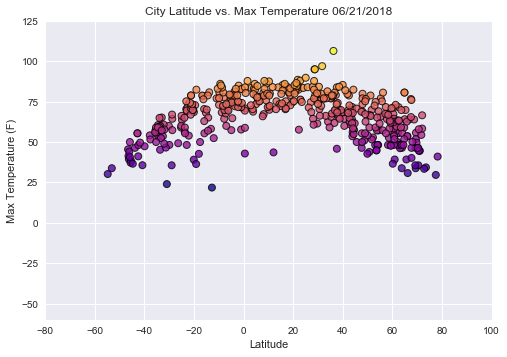

In [9]:
plt.scatter(cities_df["Latitude"], 
            cities_df["Temperature (F)"], c=cities_df["Temperature (F)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Max Temperature {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-60, 125])

# Save the figure
plt.savefig("Weather_Analysis/Latitude_Temperature.png")

# Show plot
plt.show()

# Lattitude vs Humidity 

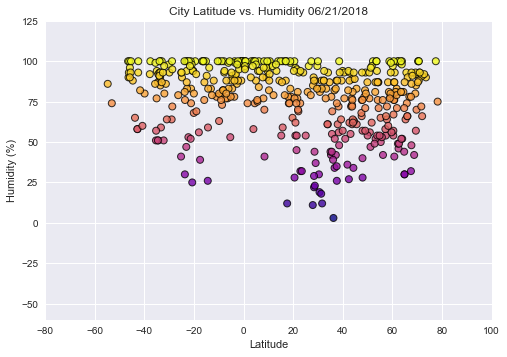

In [10]:
plt.scatter(cities_df["Latitude"], 
            cities_df["Humidity (%)"], c=cities_df["Humidity (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Humidity {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-60, 125])

# Save the figure
plt.savefig("Weather_Analysis/Latitude_Humidity.png")

# Show plot
plt.show()

# City Latitude vs Cloudiness (%)

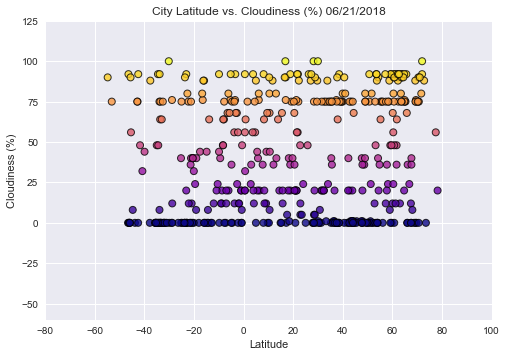

In [11]:
plt.scatter(cities_df["Latitude"], 
            cities_df["Cloudiness (%)"], c=cities_df["Cloudiness (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Cloudiness (%) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-60, 125])

# Save the figure
plt.savefig("Weather_Analysis/Latitude_Cloudiness.png")

# Show plot
plt.show()

# Wind Speed (mph) vs. Latitude


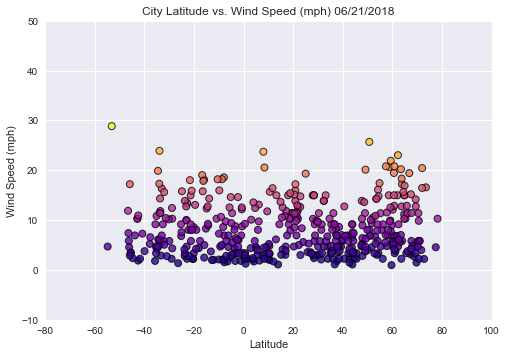

In [12]:
#Build a scatter plot for Latitude vs. Wind Speed (mph)

plt.scatter(cities_df["Latitude"], 
            cities_df["Wind Speed (mph)"], c=cities_df["Wind Speed (mph)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Wind Speed (mph) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 50])

# Save the figure
plt.savefig("Weather_Analysis/Latitude_WindSpeed.png")

# Show plot
plt.show()